# Data Transformation Distribution Changes

In this notebook we're plotting the distribution changes for CD3+, CD4+, and CD8- T Helper cells to illustrate how the expression changes as part of our transformation approach.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob

In [2]:
dataset_name = 'TUMOR_006'
dataset = glob(f'data/mair-2022/{dataset_name}*')[0]
df = pd.read_parquet(dataset)

cd4_raw = df.query('CD4_faust_annotation == "+"').CD4.values
cd8_raw = df.query('CD8_faust_annotation == "-"').CD8.values
cd3_raw = df.query('CD3_faust_annotation == "+"').CD3.values

In [3]:
def adjust_colors(axs):
    for ax in axs:
        ax.set_facecolor('w')
        ax.spines['bottom'].set_color('#bbb')
        ax.spines['top'].set_color('w') 
        ax.spines['right'].set_color('w')
        ax.spines['left'].set_color('w')
        ax.tick_params(axis='x', colors='#bbb')
        ax.tick_params(axis='y', colors='w')
        ax.xaxis.label.set_color('#bbb')
        ax.yaxis.label.set_color('w')

In [4]:
# Okabe Ito
cd3_color = '#56B4E9'
cd4_color = '#F0E442'
cd8_color = '#CC79A7'

### Raw Expression

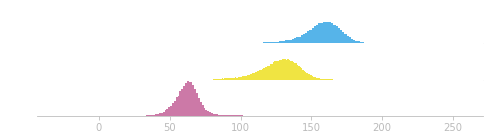

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
fig.set_size_inches(8, 2)
fig.subplots_adjust(hspace=0)

ax1.hist(cd3_raw, 100, density=True, color=cd3_color)
ax2.hist(cd4_raw, 100, density=True, color=cd4_color)
ax3.hist(cd8_raw, 100, density=True, color=cd8_color)
adjust_colors([ax1, ax2, ax3])

fig.savefig('CD3+_vs_CD4+_CD8-_raw.png', dpi=100)
plt.show()

### Winsorization

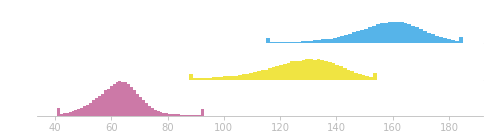

In [6]:
from scipy.stats.mstats import winsorize

cd4_winsorized = winsorize(cd4_raw, limits=[0.01, 0.01])
cd8_winsorized = winsorize(cd8_raw, limits=[0.01, 0.01])
cd3_winsorized = winsorize(cd3_raw, limits=[0.01, 0.01])

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
fig.set_size_inches(8, 2)
fig.subplots_adjust(hspace=0)

ax1.hist(cd3_winsorized, 50, density=True, color=cd3_color)
ax2.hist(cd4_winsorized, 50, density=True, color=cd4_color)
ax3.hist(cd8_winsorized, 50, density=True, color=cd8_color)
adjust_colors([ax1, ax2, ax3])

fig.savefig('CD3+_vs_CD4+_CD8-_winsorized_white.png', dpi=100)
plt.show()

### Normalization

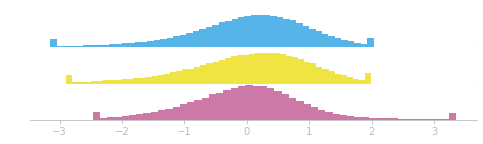

In [7]:
def norm(values):
    mean = values.mean()
    sd = np.nan_to_num(values.std())
    sd = 1 if sd == 0 else sd

    values_normalized = values.copy()
    values_normalized -= mean
    values_normalized /= sd
    
    return values_normalized

cd4_normalized = norm(cd4_winsorized)
cd8_normalized = norm(cd8_winsorized)
cd3_normalized = norm(cd3_winsorized)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
fig.set_size_inches(8, 2)
fig.subplots_adjust(hspace=0)

ax1.hist(cd3_normalized, 50, density=True, color=cd3_color)
ax2.hist(cd4_normalized, 50, density=True, color=cd4_color)
ax3.hist(cd8_normalized, 50, density=True, color=cd8_color)
adjust_colors([ax1, ax2, ax3])

fig.savefig('CD3+_vs_CD4+_CD8-_normalized_white.png', dpi=100)
plt.show()

### Translation

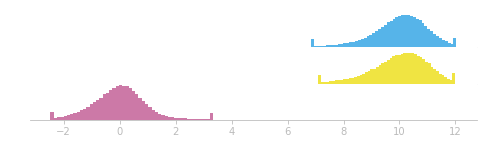

In [8]:
cd4_translated = cd4_normalized + 10
cd8_translated = cd8_normalized
cd3_translated = cd3_normalized + 10

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True)
fig.set_size_inches(8, 2)
fig.subplots_adjust(hspace=0)

ax1.hist(cd3_translated, 50, density=True, color=cd3_color)
ax2.hist(cd4_translated, 50, density=True, color=cd4_color)
ax3.hist(cd8_translated, 50, density=True, color=cd8_color)
adjust_colors([ax1, ax2, ax3])

fig.savefig('CD3+_vs_CD4+_CD8-_translated_white.png', dpi=100)
plt.show()